# Тема 5. Генерация случайных величин

In [1]:
import numpy as np
import math as mt
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

### 1 Задание

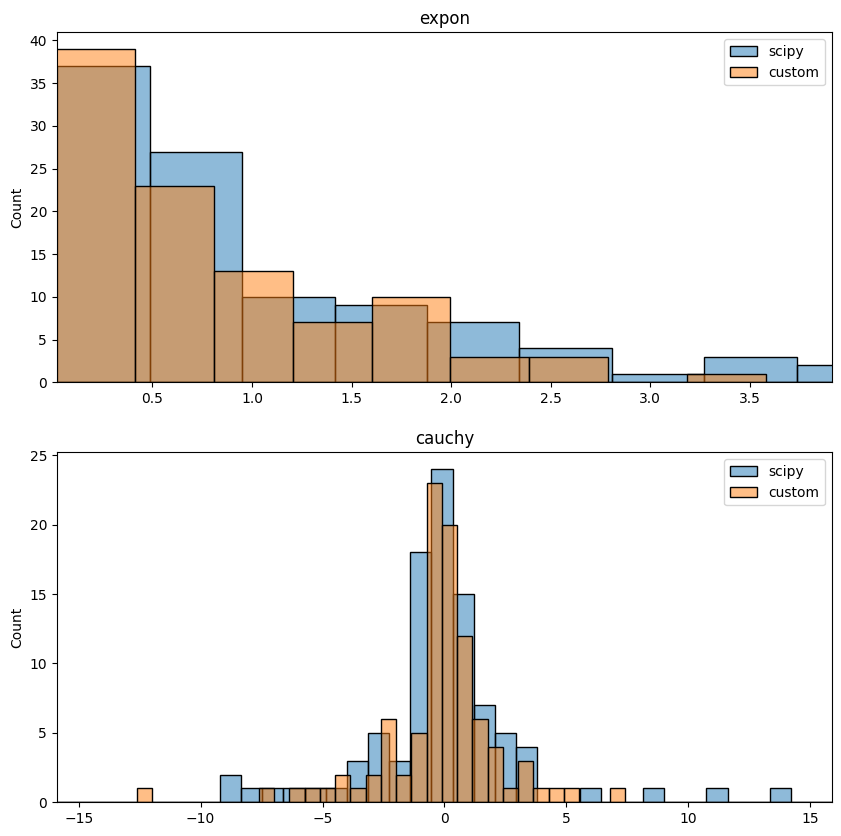

In [9]:
n = 100
variables = (
    (st.expon(scale=1/1), lambda y: -mt.log(y)),
    (st.cauchy(), lambda y: mt.tan(mt.pi * (y - 0.5)))
)

fig, axes = plt.subplots(len(variables), 1, figsize=(10, 10))

for ax, (rv, func) in zip(axes, variables):
    ax.set_xlim((rv.ppf(0.02), rv.ppf(0.98)))
    samples = rv.rvs(n)
    sns.histplot(samples, alpha=0.5, ax=ax, label="scipy")
    samples = np.array([func(y) for y in st.uniform.rvs(size=n)])
    sns.histplot(samples, alpha=0.5, ax=ax, label="custom")
    ax.set_title(rv.dist.name)
    ax.legend()

### 2 Задание

**(А) Acceptance-rejection**

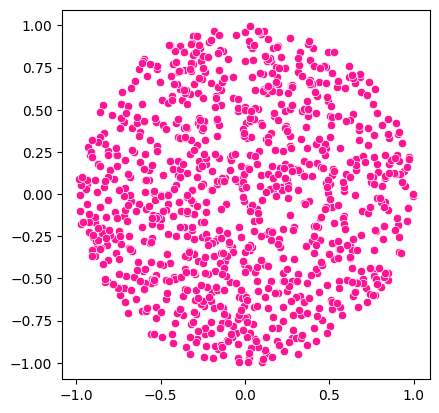

In [48]:
n = 1250
fig = plt.figure()
ax = fig.add_subplot()
rv = st.uniform(loc=-1, scale=2)
pts = rv.rvs((n, 2))
pts = pts[np.linalg.norm(pts, axis=1) <= 1, :]
sns.scatterplot(x=pts[:, 0], y=pts[:, 1], c='deeppink')
ax.set_aspect('equal', adjustable='box')

**(Б) Условные распределения**

$$ f_{X,Y} (x,y) = \left\{ \begin{matrix}\pi^{-1}, x^2+y^2 \leq 1 \\ 0, x^2+y^2 > 1 \end{matrix} \right. $$
$$ f_X (x) = \int \limits_{-\infty}^{\infty} f_{X,Y}(x,y)dy = \int \limits_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \pi^{-1}dy = \frac{2}{\pi}\sqrt{1-x^2} $$
$$ 
F_X (x) = \int \limits_{-1}^{x} \frac{2}{\pi}\sqrt{1-t^2} dt =
\frac{1}{\pi} \left( t \sqrt{1-t^{2}} + \arcsin t \right) \bigg\rvert_{-1}^{x} =
\frac{1}{\pi} \left( x \sqrt{1-x^{2}} + \arcsin x + \frac{\pi}{2} \right) =
\frac{1}{\pi} \left( x \sqrt{1-x^{2}} + \arccos(-x) \right)
$$

In [67]:
# Находит единственный корень уравнения f(x) = y с точностью eps
# f монотонно возрастает на отрезке [a; b] и уравнение имеет единственный корень
def binsearch(f, y, a, b, eps):
    STOP_ITER = 70
    l, r = a, b
    m = a / 2 + b / 2
    c = eps
    iters = 0
    while c <= b - a and iters < STOP_ITER:
        m = l / 2 + r / 2
        if f(m) < y:
            l = m
        else:
            r = m
        c *= 2
        iters += 1
    return m

CPU times: user 32.5 ms, sys: 20.5 ms, total: 53.1 ms
Wall time: 64.5 ms


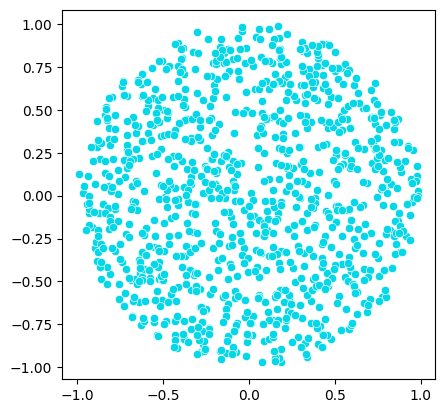

In [72]:
%%time

n = 1_000
EPS = 1e-9
F = lambda x: 1 / mt.pi * (x * mt.sqrt(1 - x**2) + mt.acos(-x))

fig = plt.figure()
ax = fig.add_subplot()

pts = st.uniform.rvs(size=n)
bs = np.vectorize(binsearch)
x = bs(F, pts, -1, 1, EPS)
# assert(np.max(np.abs(np.vectorize(F)(x) - pts)) < EPS)
c = np.sqrt(1 - x**2)
y = st.uniform.rvs(loc=-c, scale=2*c)
sns.scatterplot(x=x, y=y, c='#02d8e9')
ax.set_aspect('equal', adjustable='box')

**(В) Полярные коор**

Пусть $R = \sqrt{X^2 + Y^2}$.

Тогда $p_{R}(x) = 2x$ при $ 0 \leq x \leq 1 $ 

Значит $R^2 \sim U[0;1]$

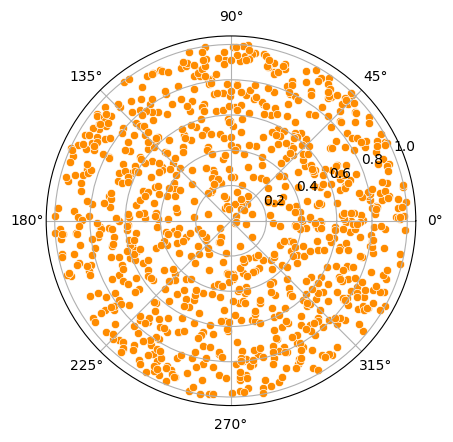

In [55]:
n = 1_000
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
Phi = st.uniform(loc=0, scale=2 * mt.pi)
R2 = st.uniform(loc=0, scale=1)
phi = Phi.rvs(n)
r = np.sqrt(R2.rvs(n))
sns.scatterplot(x=phi, y=r, c='darkorange');

### Задание 3

**(А) Лаплас**

**(Б)** $\frac{1}{2}e^{-x}$ при $x > 0$ и $e^{2x}$ при $x \leq 0$.

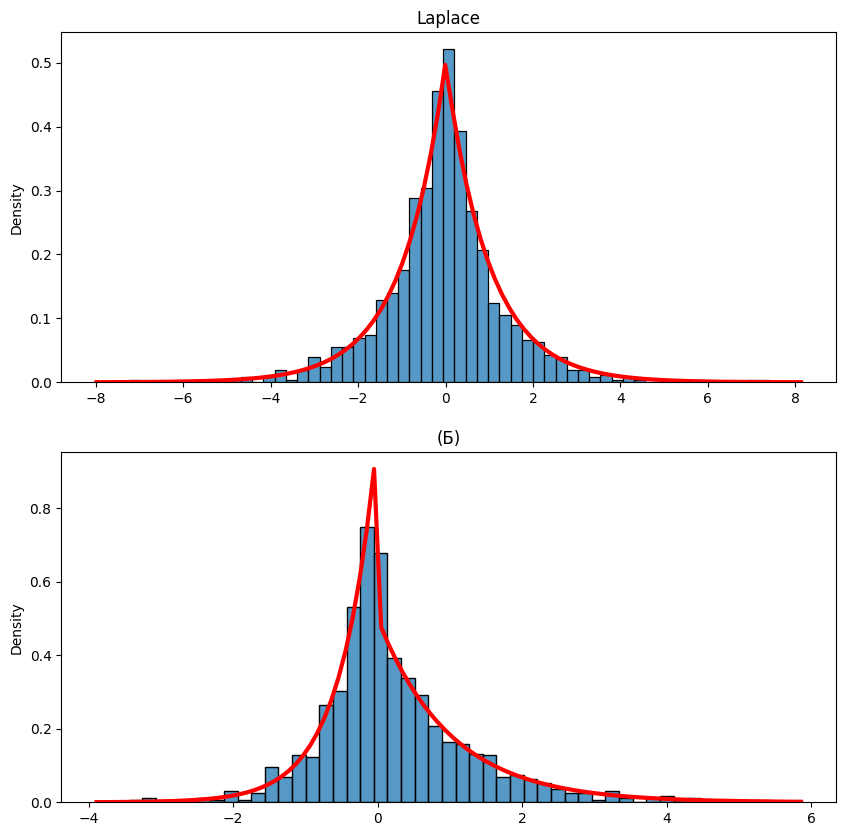

In [56]:
n = 1000

variables = (
    (
        "Laplace",
        lambda x : 0.5 * mt.exp(-abs(x)),
        st.bernoulli(0.5),
        (
            lambda y: mt.log(y),
            lambda y: -mt.log(y)
        )
    ),
    (
        "(Б)",
        lambda x: 0.5 * mt.exp(-x) if x > 0 else mt.exp(2 * x),
        st.bernoulli(0.5),
        (
            lambda y: -mt.log(y),
            lambda y: 0.5 * mt.log(y)
        )
        
    )
)

fig, axes = plt.subplots(len(variables), 1, figsize=(10, 10))

for ax, (name, pdf, selector, inv_cdfs) in zip(axes, variables):
    distr_inds = selector.rvs(n)
    u = st.uniform.rvs(size=n)
    sample = np.array([inv_cdfs[i](y) for i, y in zip(distr_inds, u)])
    sns.histplot(sample, stat='density', ax=ax)
    x = np.linspace(*ax.get_xlim(), 100)
    y = np.vectorize(pdf)(x)
    ax.plot(x, y, c='r', lw=3)
    ax.set_title(name)

### Задание 5

In [61]:
def generate_triangular(n=1):
    res = np.zeros(n)
    i = 0
    while i < n:
        x = st.uniform.rvs(loc=-1, scale=2)
        p = 1 - abs(x)
        if st.bernoulli.rvs(p):
            res[i] = x
            i += 1
    return res

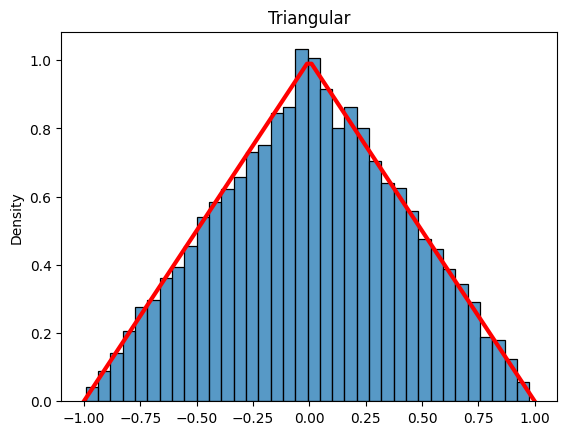

In [77]:
n = 10000
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(generate_triangular(n), stat='density', ax=ax)
x = np.linspace(-1, 1, 100)
y = 1 - np.abs(x)
ax.plot(x, y, c='r', lw=3)
ax.set_title("Triangular");